In [52]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# Mengimpor dataset
dataset=pd.read_csv("SeranganNormal.csv",delimiter=';')
X = dataset.iloc[:, [1, 2]].values
Y = dataset.iloc[:, 5].values

In [54]:
dataset.drop(['Time'],axis=1,inplace=True)
dataset.drop(['Length'],axis=1,inplace=True)

In [55]:
X

array([[  192168102, 19216810255],
       [ 1921681011,   192168103],
       [ 1921681011,   192168103],
       ...,
       [  192168104,  1921681010],
       [ 1921681010,   192168105],
       [  192168105,  1921681010]], dtype=int64)

In [56]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
# Menjadi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\hp\Documents\temp\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Documents\temp\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Documents\temp\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
X_train

array([[ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463],
       ...,
       [ 0.33916234, -0.10290463],
       [ 0.33916233, -0.10290463],
       [ 0.33916234, -0.10290463]])

In [60]:
X_test

array([[ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463],
       ...,
       [ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463],
       [ 0.33916234, -0.10290463]])

In [61]:
Y_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [62]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
# Membuat model Naive Bayes terhadap Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

In [65]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [75]:
cm

array([[ 228,   19],
       [  58, 2445]], dtype=int64)

In [88]:
print("Accuracy", metrics.accuracy_score(Y_test, y_pred))

NameError: name 'metrics' is not defined

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


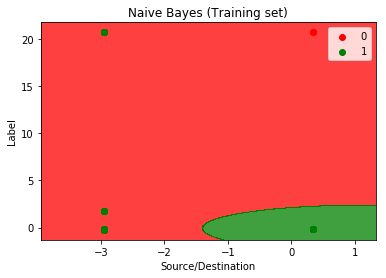

In [42]:
# Visualisasi hasil model Naive Bayes dari Training set
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Source/Destination')
plt.ylabel('Label')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


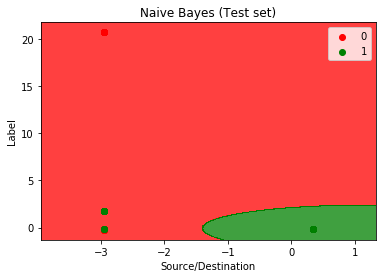

In [43]:
# Visualisasi hasil model Naive Bayes dari Test set
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Source/Destination')
plt.ylabel('Label')
plt.legend()
plt.show()